### Import libraries

In [1]:
import sys
sys.path.insert(0, '../backend')
sys.path.insert(0, '../data')
sys.path.insert(0, '../images')

In [3]:
import numpy as np
import torch
import pandas as pd
import importlib
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, MinMaxScaler

import knn_dtw

# Load music signals

In [74]:
data_train = arff.loadarff('../data/AtrialFibrillation/AtrialFibrillation_TRAIN.arff')
data_test = arff.loadarff('../data/AtrialFibrillation/AtrialFibrillation_TEST.arff')

df_train = pd.DataFrame(data_train[0]).iloc[::2,:]
df_test = pd.DataFrame(data_test[0]).iloc[::2,:]

In [75]:
# labels_train = df_train.activity
# labels_test = df_test.activity
labels_train = df_train.target 
labels_test = df_test.target

y_train = LabelEncoder().fit_transform(labels_train)
y_test = LabelEncoder().fit_transform(labels_test)

# x_train = [np.array(a.tolist()).T for a in df_train.relationalAtt]
# x_test = [np.array(a.tolist()).T for a in df_test.relationalAtt]
x_train = [np.array(a.tolist()).T for a in df_train.ECG_Atrial_Fibrilation]
x_test = [np.array(a.tolist()).T for a in df_test.ECG_Atrial_Fibrilation]

length = x_train[0].shape[0]

# Set up training and evaluation sets

# NN Classifiers

In [76]:
importlib.reload(knn_dtw)

<module 'knn_dtw' from '../backend\\knn_dtw.py'>

In [80]:
label, proba, acc_score, conf_mat = knn_dtw.knn_dtw(x_train, x_test, y_train, y_test, sub_rate=0.1, 
                                                    length=length, replace=False, n_neighbours=1)

In [81]:
acc_score

0.375

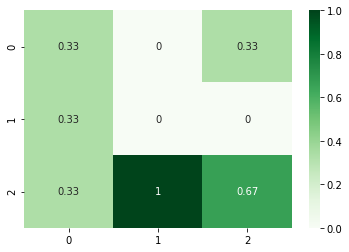

In [82]:
sns.heatmap(conf_mat, cmap="Greens", annot=True)
plt.show()